In [12]:
%matplotlib inline

#Basic filtering

##Point-wise transformations


In [13]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

image = io.imread('./neighborhood6.jpg')

imgray = np.mean(image,2)
imgray = imgray.astype('uint8')

FileNotFoundError: No such file: '/home/bifuz/Documentos/4info/PI/neighborhood6.jpg'

Point-wise transformation apply a real function to each pixel of the image independently. The most well known transformation is negation.

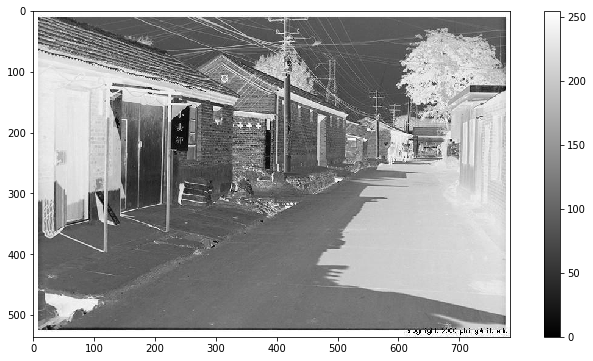

In [7]:
#Negated
imRes = np.max(imgray)-imgray
plt.imshow(imRes,cmap="gray")
plt.colorbar()
plt.gcf().set_size_inches((12,6))

We can generalize this process by defining a **LUT** (Look up table) encoding the transformation of each pixel value into a new value.

Max value: 5.54517744448


(0, 255)

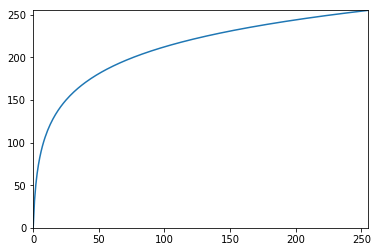

In [8]:
import numpy as np
#And let us go for a LUT from a function
#For example using an array

input = np.arange(256)
tmp = np.log(1+input) 
print ('Max value: '+ str(np.max(tmp)))

tmp = tmp/np.max(tmp)
lut = tmp*255

plt.plot(input,lut)
ax = plt.gca()
ax.set_xlim((0,255))
ax.set_ylim((0,255))


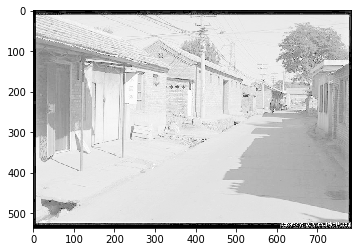

In [9]:
#Apply the lut
imres = np.floor(lut[imgray]).astype('uint8')
plt.imshow(imres,cmap="gray")


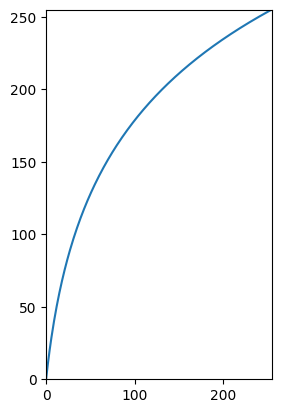

interactive(children=(FloatSlider(value=-4.0, description='logalpha', max=2.0, min=-10.0, step=1.0), Output())…

<function __main__.coolog(logalpha)>

In [11]:
#Some cool stuff
import numpy as np
from ipywidgets.widgets import interact

#And let us go for a LUT from a function
#For example using an array

def coolog(logalpha):
    alpha = np.power(2,logalpha)
    input = np.array((range(256))).astype(float)
    tmp = np.log(1+alpha*input) 

    tmp = tmp/np.max(tmp)
    lut = tmp*255
    plt.subplot(1,2,1)

    plt.plot(input,lut)
    ax = plt.gca()
    ax.set_xlim((0,255))
    ax.set_ylim((0,255))
    imres = lut[imgray]
    plt.subplot(1,2,2)
    plt.imshow(imres,cmap="gray")
    plt.gcf().set_size_inches((16,6))
    plt.show()

interact(coolog,logalpha=(-10.,2.,1.))

##Neighborhood operations and classical filtering

Different packages in python contain specific filter functions. For example, scikit-image or ndimage directly allows to apply filters such as gaussian filters, sobel, etc.

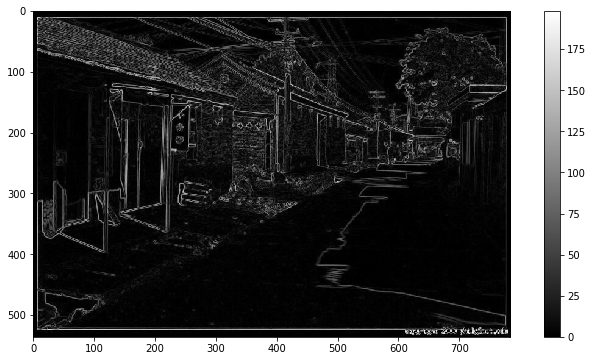

In [11]:
from skimage import filters

plt.imshow(filters.sobel(imgray.astype(float)),cmap="gray")
plt.gcf().set_size_inches((12,6))
plt.colorbar()

Generic filtering

There are several convolutions in scipy. We will just use two of them. The first one allows to compute the full convolution. This is interesting for understanding what convolutions is about. In general we will use the one in ndimage.filters.convolve which is a little faster. In future classes we may code our quick version of the convolution which will be even faster by means of the Fast Fourier Transform.

Original shape: (39, 52)
Convolved shape:(41, 54)


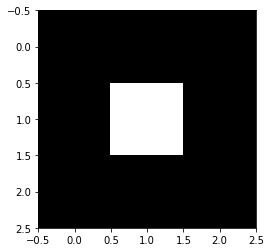

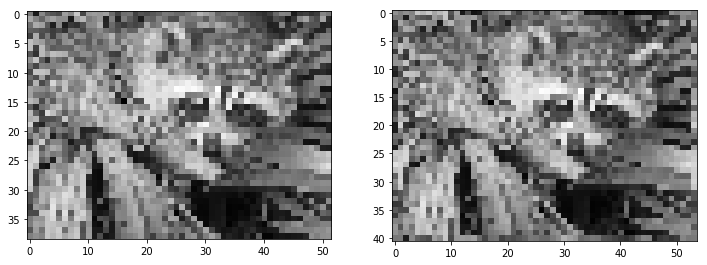

In [14]:
from scipy import signal,misc

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

image = rgb2gray(misc.face())
image=image[::20,::20]
h = np.array([[0, 0, 0],
              [0, 1, 0],
              [0, 0, 0]])
plt.imshow(h,interpolation="nearest",cmap="gray")
plt.figure()
plt.gcf().set_size_inches((12,6))
plt.imshow(image)
convimage = signal.convolve2d(image,h, mode='full', boundary='wrap')
plt.subplot(121)
plt.imshow(image,cmap="gray")
plt.subplot(122)
plt.imshow(convimage,cmap="gray")
print ("Original shape: "+str(image.shape))
print ("Convolved shape:"+str(convimage.shape))

There is a change in the size of the image. Let us try with another filter.

Original shape: (39, 52)
Convolved shape:(139, 152)


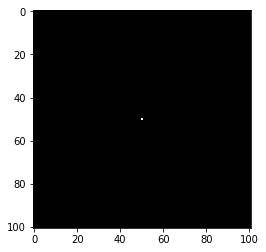

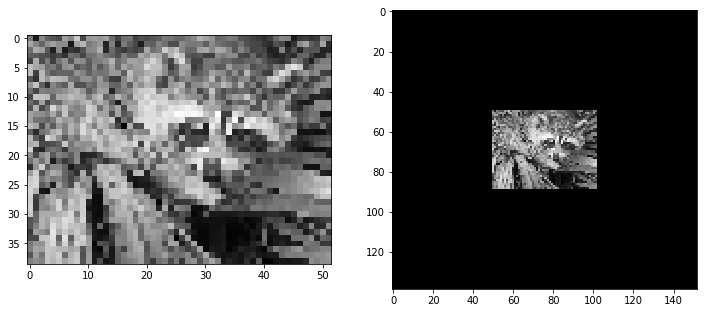

In [15]:
h = np.zeros((101,101))
h[50,50]=1.0
plt.imshow(h,interpolation="nearest",cmap="gray")
plt.figure()
convimage = signal.convolve2d(image, h, mode='full', boundary='fill', fillvalue=0.)

plt.figure()
plt.gcf().set_size_inches((12,6))
plt.imshow(image)

plt.subplot(121)
plt.imshow(image,cmap="gray")
plt.subplot(122)
plt.imshow(convimage,cmap="gray")
print ("Original shape: "+str(image.shape))
print ("Convolved shape:"+str(convimage.shape))

<div class="alert alert-success">**EXERCISE:**

Verify that the size of the convolved signal is $$M+N-1$$
</div>

###Convolution modes

Observe that there is an undefinition in the borders of the image. **What is the value we have to multiply with when the mask is not completely inside the image?** 

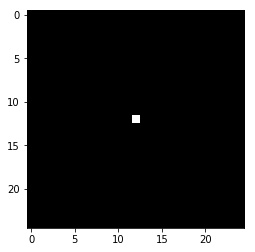

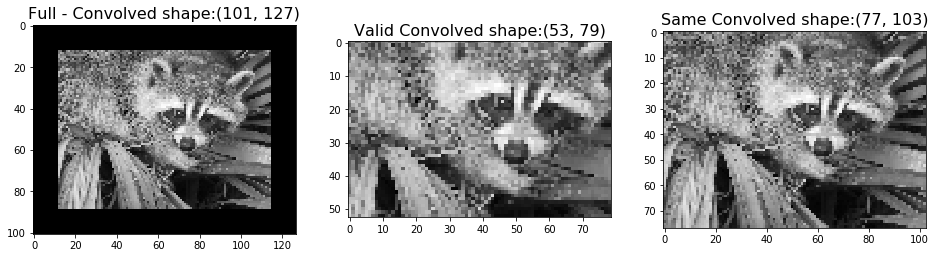

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, misc
#Check the convolution modes
image = rgb2gray(misc.face())
image=image[::10,::10]

h = np.zeros((25,25))
h[12,12]=1.0
plt.imshow(h,interpolation="nearest",cmap="gray")
plt.figure()
convimage = signal.convolve2d(image, h, mode='full', boundary='fill', fillvalue=0.)
s = "Convolved shape:"+str(convimage.shape)
plt.subplot(1,3,1)
plt.imshow(convimage,cmap="gray")
plt.title('Full - '+s, size=16)
convimage = signal.convolve2d(image, h, mode='valid', boundary='fill', fillvalue=0.)
s = "Convolved shape:"+str(convimage.shape)
plt.subplot(1,3,2)
plt.imshow(convimage,cmap="gray")
plt.title('Valid ' +s, size=16)
convimage = signal.convolve2d(image, h, mode='same', boundary='fill', fillvalue=0.)
s = "Convolved shape:"+str(convimage.shape)
plt.subplot(1,3,3)
plt.imshow(convimage,cmap="gray")
plt.title('Same ' +s, size=16)
plt.gcf().set_size_inches((16,6))


In [17]:
#Check the border values
#h = np.zeros((101,101))
#h[50,50]=1.0
#plt.imshow(h,interpolation="nearest",cmap="gray")
#plt.figure()
#convimage = signal.convolve2d(image, h, mode='full', boundary='fill', fillvalue=0.)
#print ("Convolved shape:"+str(convimage.shape))
#plt.subplot(1,3,1)
#plt.imshow(convimage,cmap="gray")
#convimage = signal.convolve2d(image2, h, mode='full', boundary='symm')
#print ("Convolved shape:"+str(convimage.shape))
#plt.subplot(1,3,2)
#plt.imshow(convimage,cmap="gray")
#convimage = signal.convolve2d(image, h, mode='full', boundary='wrap')
#print ("Convolved shape:"+str(convimage.shape))
#plt.subplot(1,3,3)
#plt.imshow(convimage,cmap="gray")
#plt.gcf().set_size_inches((16,6))

The valid region will always have the same values for all images independent of the border filling. <span style="color:red">How can we check it?</span>

In [18]:
#Write your verification here




Let us change from the signal package to ndimage. It uses the 'same' modifier.

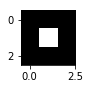

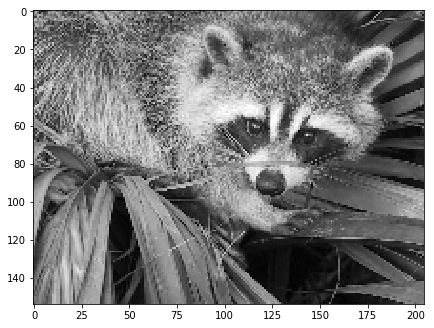

In [19]:
import numpy as np
from scipy import misc, ndimage
import matplotlib.pyplot as plt

imageRGB = misc.face()
imageRGB=imageRGB[::5,::5,:]
image= np.mean(imageRGB,2)
# ALTERNATIVE TO :-> image = rgb2gray(imageRGB)

h = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])
plt.imshow(h,interpolation="nearest",cmap="gray")
plt.gcf().set_size_inches((1,1))
plt.figure()
convimage = ndimage.convolve(image, h)
plt.imshow(convimage,cmap="gray")
plt.gcf().set_size_inches((7,7))

In [20]:
#Check image size
print (image.shape)
print (convimage.shape)

(154, 205)
(154, 205)


##Practicing with filters

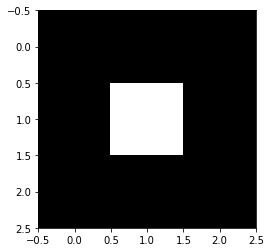

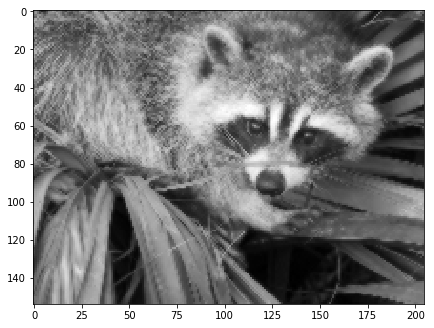

In [22]:
h = np.array([[1, 1, 1],
                 [1, 8, 1],
                 [1, 1, 1]])/16.
plt.imshow(h,interpolation="nearest",cmap="gray")
plt.figure()
convimage = ndimage.convolve(image, h)
plt.imshow(convimage,cmap="gray")
plt.gcf().set_size_inches((7,7))

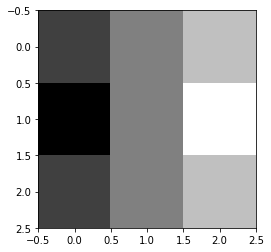

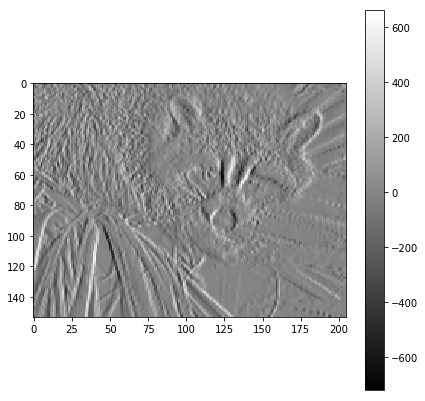

In [23]:
#Sobel
h = np.array([[-1, 0, 1],
                 [-2, 0, 2],
                 [-1, 0, 1]])
plt.imshow(h,interpolation="nearest",cmap="gray")
plt.figure()
convimage = ndimage.convolve(image, h)
plt.imshow(convimage,cmap="gray")
plt.colorbar()
plt.gcf().set_size_inches((7,7))

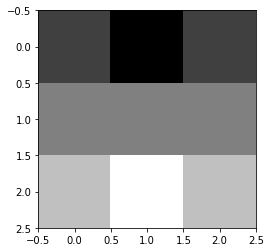

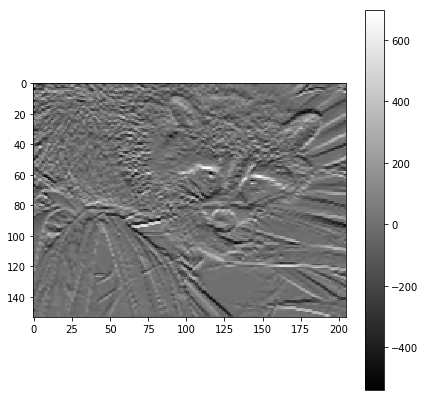

In [24]:
#Sobel
h = np.array([[-1, -2, -1],
                 [0, 0, 0],
                 [1, 2, 1]])
plt.imshow(h,interpolation="nearest",cmap="gray")
plt.figure()
convimage2 = ndimage.convolve(image, h)
plt.imshow(convimage2,cmap="gray")
plt.colorbar()
plt.gcf().set_size_inches((7,7))

Now take the magnitude.

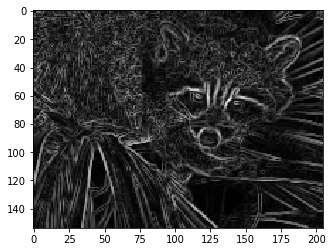

In [25]:
plt.imshow(np.sqrt(convimage*convimage+convimage2*convimage2),cmap='gray')

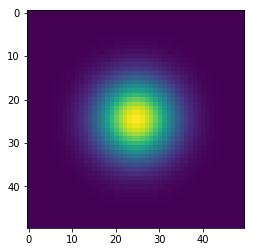

In [26]:
#Gaussian filter
SZ = 50
[xx,yy]=np.meshgrid(np.linspace(-4,4,SZ),np.linspace(-4,4,SZ))
gaussian = np.exp(-0.5*(xx*xx+yy*yy))
plt.imshow(gaussian)

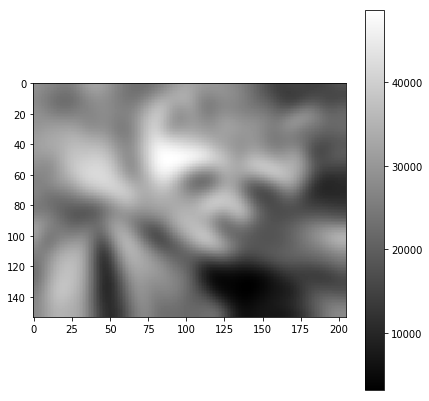

In [27]:
from scipy import misc, ndimage
#Filter lenna with the gaussian
imageRGB = misc.face()
imageRGB=imageRGB[::5,::5,:]
image= np.mean(imageRGB,2)
convimage = ndimage.convolve(image, gaussian)
plt.imshow(convimage,cmap="gray")
plt.colorbar()
plt.gcf().set_size_inches((7,7))

<div class="alert alert-success">
**EXERCISE:**
Now suppose we have a blurred image $I_b$. Let us apply the following equation and check what happens

$$I_o = I_b + \alpha \cdot (I_b - I_b\ast h)$$

where $\alpha$ is a real value and $h$ is a gaussian filter.
<p>
**QUESTIONS:**
<ul>
<li> What does $I_b\ast h$ do?</li>
<li> Describe the resulting effect. What does $I_o$ contain?</li>
</ul>
</div>

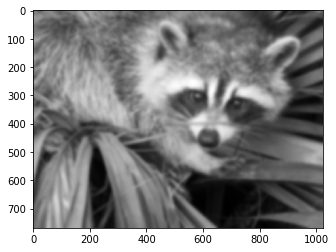

In [28]:
from scipy import misc,ndimage
import matplotlib.pyplot as plt

imageRGB = misc.face()
#imageRGB=imageRGB[::5,::5,:]
image= np.mean(imageRGB,2)
Ib=ndimage.gaussian_filter(image,5)
plt.imshow(Ib,cmap="gray")

In [29]:
# Write your code here

##Denoising

In [30]:
print(image.shape)

(768, 1024)


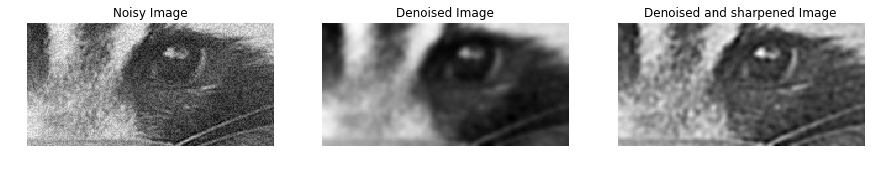

In [33]:
from scipy import ndimage
clena = image[300:400,600:800]
noisy = clena + 1 * clena.std() * np.random.random(clena.shape)
gauss_denoised = ndimage.gaussian_filter(noisy, 2)
plt.subplot(1,3,1)
plt.imshow(noisy,cmap="gray")
plt.axis('off')
plt.title('Noisy Image')
plt.subplot(1,3,2)
plt.imshow(gauss_denoised,cmap="gray")
plt.axis('off')
plt.title('Denoised Image')
plt.gcf().set_size_inches((10,10))
plt.subplot(1,3,3)
sharp = gauss_denoised+15*(gauss_denoised-ndimage.gaussian_filter(gauss_denoised,1))
plt.imshow(sharp,cmap="gray")
plt.axis('off')
plt.title('Denoised and sharpened Image')
plt.gcf().set_size_inches((15,10))



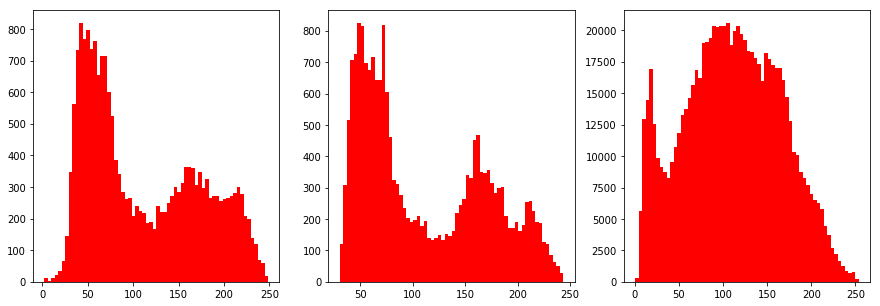

In [33]:
plt.subplot(1,3,1)
ax = plt.gca()
histogram = ax.hist(noisy.ravel(), bins=64, histtype='bar', color='red')
plt.subplot(1,3,2)
ax = plt.gca()
histogram = ax.hist(gauss_denoised.ravel(), bins=64, histtype='bar', color='red')
plt.subplot(1,3,3)
ax = plt.gca()
histogram = ax.hist(image.ravel(), bins=64, histtype='bar', color='red')
plt.gcf().set_size_inches((15,5))